In [7]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

### 938. Range Sum of BST
Given the root node of a binary search tree and two integers low and high, return the sum of values of all nodes with a value in the inclusive range [low, high].

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = [10,5,15,3,7,null,18]
low, high = 7, 15
# in-order traversal
# note: low<=high, root (e.g., 10) is given 
class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        stack = [root]
        res = 0
        while stack:
            node = stack.pop()
            if node:
                if low <= node.val <= high:
                    res += node.val
                if low <= node.val:
                    stack.append(node.left)
                if node.val <= high:
                    stack.append(node.right)
        return res
# recursion approach time complexity O(N)
class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        def dfs(node):
            if not node:
                return 0
            if node.val <= low:
                return dfs(node.right)
            elif node.val >= high:
                return dfs(node.left)
            else:
                return dfs(node.left) + dfs(node.right) + node.val
        return dfs(root)

### 872. Leaf-Similar Trees
Consider all the leaves of a binary tree, from left to right order, the values of those leaves form a leaf value sequence. <br>
https://leetcode.com/problems/leaf-similar-trees/
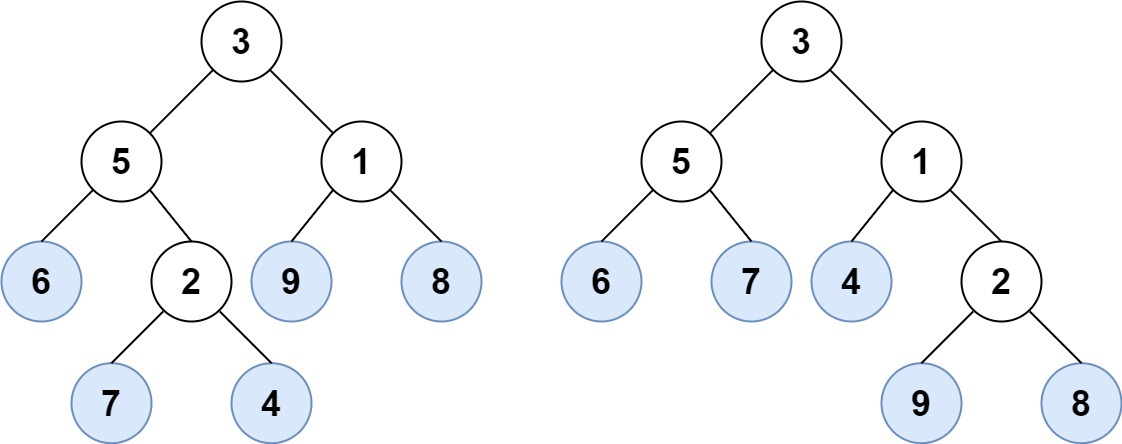

In [4]:
root1 = [3,5,1,6,2,9,8,null,null,7,4]
root2 = [3,5,1,6,7,4,2,null,null,null,null,null,null,9,8]

# recursion, depth-first
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def dfs(node):
            if not node: return []
            if not node.left and not node.right:
                return [node.val]
            return dfs(node.left) + dfs(node.right)
        leaf1 = dfs(root1)
        leaf2 = dfs(root2)
        return leaf1 == leaf2
    
# iterative, preorder
class Solution2:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def leafs(root):
            if not root: return 
            stack = [root]
            leaf = []
            while stack:
                node = stack.pop()
                if not node:
                    continue
                stack.append(node.right)
                stack.append(node.left)
                if not node.left and not node.right:
                    leaf.append(node.val)
            return leaf
        return leafs(root1) == leafs(root2)

### 1026. Maximum Difference Between Node and Ancestor
Given the root of a binary tree, find the maximum value v for which there exist different nodes a and b where v = |a.val - b.val| and a is an ancestor of b. <br>
A node a is an ancestor of b if either: any child of a is equal to b or any child of a is an ancestor of b.<br>
https://leetcode.com/problems/maximum-difference-between-node-and-ancestor/

In [ ]:
root = [8,3,10,1,6,null,14,null,null,4,7,13]
# recursion
class Solution:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        def dfs(root, mini, maxi):
            if not root:return 0
            # maxium difference can be found wit the current node
            res = max(abs(root.val - mini), abs(maxi - root.val))
            # re-calculate the minimum and maximum values
            mini = min(mini, root.val)
            maxi = max(maxi, root.val)
            # recurse left and right with the updated maximum and minimum values
            return max(res, dfs(root.left, mini, maxi), dfs(root.right, mini, maxi))
        return dfs(root, root.val, root.val)

# iteration
class Solution2:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        stack = [(root, root.val, root.val)]  # node, parent, child
        res = 0
        while stack:
            node, parent, child = stack.pop()
            res = max(res, abs(parent - child))
            if node.left:
                stack.append((node.left, max(parent, node.left.val), min(child, node.left.val)))
            if node.right:
                stack.append((node.right, max(parent, node.right.val), min(child, node.right.val)))
        return res

### 1339. Maximum Product of Splitted Binary Tree
Given the root of a binary tree, split the binary tree into two subtrees by removing one edge such that the product of the sums of the subtrees is maximized.<br>
Return the maximum product of the sums of the two subtrees. Since the answer may be too large, return it modulo 109 + 7.<br>
Note that you need to maximize the answer before taking the mod and not after taking it.<br>
https://leetcode.com/problems/maximum-product-of-splitted-binary-tree/

In [ ]:
root = [1,2,3,4,5,6]
class Solution:
    def maxProduct(self, root: Optional[TreeNode]) -> int:
        # calculte total sum
        def dfsSum(root):
            if not root: return 0
            treeSum = root.val + dfsSum(root.left) + dfsSum(root.right)
            subTreeSum.append(treeSum)
            return treeSum
        subTreeSum = []
        total = dfsSum(root)
        res = 0
        for i in subTreeSum:
            res = max(res, i * (total - i))
        return res % (10**9 + 7)

### 124. Binary Tree Maximum Path Sum *Hard*
A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once.<br> 
Note that the path does not need to pass through the root.<br>
The path sum of a path is the sum of the node's values in the path.<br>
Given the root of a binary tree, return the maximum path sum of any non-empty path.

In [10]:
root = [-1,-2,10,-6,null,-3,-6]
# recursive solution dfs , time O(n)
class Solution:
    def __init__(self):
        self.res = float('-inf')
    def maxPathSum(self, root:[TreeNode]):
        def dfsSum(root):
            if not root: return 0
            left = dfsSum(root.left)
            right = dfsSum(root.right)
            self.res = max(self.res, root.val+left+right)
            return max(root.val + max(left, right), 0)
        dfsSum(root)
        return self.res
# iterative
from collection import defaultdict
class Solution2:
    def maxPathSum(self, root):
        res = float('-inf')
        stack, last, d = [], None, defaultdict(int)
        while root or stack:
            while root:
                stack.append(root)
                root = root.left
            node = stack[-1]
            if node.right and last != node.right:
                root = node.right
            else:
                node = stack.pop()
                last = node
                d[node] = max(0, max(d[node.left], d[node.right] + node.val))
                res = max(res, node.val + d[node.left] + d[node.right])
        return res